# **Sentiment Analysis**

In this project a sentiment analysis of the Game of Throne book is performed. Two libraries; text blob, and NLTK were used to produce sentiments. The histogram of the results show that the produced sentiments of both methods are similar. Before performing the analysis the data was prepared. The preprocessing included removal of stop words, punctution, and lemmitization. The text was tokenized using NLTK package. Different vectorization methods were used and compared for best results. Bag of words, and TF-IDF from sklearn library were use for vectorization. Furtheremore, part of speech tagging was performed using NLTK library. Named entitiy recognition was performed using SpaCy Library. Part of speech tagging was chuncked using NLTK. ultimately, NLTK sentiment analyzer and TextBlob sentiment analyzer were used for sentiment analysis and comparison. 


In [2]:
# data from Kaggle: https://www.kaggle.com/khulasasndh/game-of-thrones-books#005ssb.txt
from google.colab import files
upload = files.upload()

Saving 001ssb.txt to 001ssb.txt


In [0]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import random
from nltk.stem.wordnet import WordNetLemmatizer

In [4]:
# getting all words from the book tokenized and lemmatized
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

got1 = open("001ssb.txt").read().strip().split('\n')

got = open("001ssb.txt").read()
got_words = word_tokenize(got)
stop_words=stopwords.words("english")
punct = list(string.punctuation)
stops = stop_words + punct + ["''", 'r.', '``', "'s", "n't"]

filtered_words=[]
for w in got_words:
    if w.lower() not in stops:
        filtered_words.append(w.lower())

lem = WordNetLemmatizer()
lemm_words=[]
for w in filtered_words:
    lemm_words.append(lem.lemmatize(w))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
# word exploration
print('There are', len(lemm_words), 'words total')  # 152047
print('There are', len(np.unique(lemm_words)), 'unique words')  # 152047

lemm_col = pd.Series(lemm_words)

word_counts = lemm_col.value_counts()
solo = word_counts[word_counts<2].index.values.tolist() # all words that occur more than once

remove = stops+solo

There are 152047 words total
There are 10985 unique words


In [6]:
# creating a list of cleaned strings for the words on each page
pages = pd.Series(re.split(r'Page [0-9]+', got))
print('There are', len(pages), 'pages')

from nltk.tokenize import RegexpTokenizer 
page_lemm = []
for i in range(len(pages)):
  text = pages[i]
  tokens = RegexpTokenizer(r'[a-zA-Z\']+').tokenize(text)
  final = []
  for w in tokens:
    if w.lower() not in remove:
        final.append(w.lower())
  lemm_word=[]
  for w in final:
    lemm_word.append(lem.lemmatize(w))
  page_lemm.append(' '.join(lemm_word))

There are 572 pages


In [7]:
page_lemm[0]

"game throne book one song ice fire george r r martin start back gared urged wood began grow dark around wildlings dead dead frighten ser waymar royce asked hint smile gared rise old man past fifty seen lordlings come go dead dead said business dead dead royce asked softly proof saw gared said say dead that's proof enough known would drag quarrel sooner later wished later rather sooner mother told dead men sing song put wet nurse said thing royce replied never believe anything hear woman's thing learned even dead voice echoed loud twilit forest"

In [8]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
BOW = bow.fit_transform(page_lemm)
bagOFwords = pd.DataFrame(BOW.toarray())
bagOFwords.columns = bow.get_feature_names()
bagOFwords.head()

,aback,abandon,abandoned,abashed,abduction,abed,abide,ability,able,abreast,abruptly,absence,absently,absorbed,absurd,absurdly,abyss,acastle,accent,accept,accepted,accident,accommodation,accompanied,accompany,accord,account,accursed,accusation,accuse,accused,accusing,accustomed,ache,ached,achievement,aching,acknowledged,acquired,acre,...,wroth,wrought,wry,wyl,wylis,wylla,wyman,xho,yank,yanked,yanking,yard,yarwyck,yawn,yawned,yawning,year,yearned,yearning,yelled,yelling,yellow,yellowed,yelped,yes,yesterday,yet,yi,yield,yielded,yne,yohn,yoren,young,younger,youngest,youth,yowl,yowling,yvar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [9]:
# BOW counts and exploration
count_word = bagOFwords.mean(axis=0)
small = count_word[count_word==0].index.values.tolist()
final_bag = bagOFwords.drop(small, axis=1)
print('Dimensions of Array:', final_bag.shape)
print('Top 10 Average Count Bag of Words\n', final_bag.mean(axis=0).sort_values(ascending=False)[0:10])
top_10 = final_bag.mean(axis=0).sort_values(ascending=False)[0:10].index.values.tolist()
final_bag.head()

Dimensions of Array: (572, 6879)
Top 10 Average Count Bag of Words
 said     3.403846
lord     2.590909
would    1.952797
ser      1.701049
one      1.459790
jon      1.452797
could    1.419580
hand     1.395105
ned      1.372378
man      1.363636
dtype: float64


,aback,abandon,abandoned,abashed,abduction,abed,abide,ability,able,abreast,abruptly,absence,absently,absorbed,absurd,absurdly,abyss,acastle,accent,accept,accepted,accident,accommodation,accompanied,accompany,accord,account,accursed,accusation,accuse,accused,accusing,accustomed,ache,ached,achievement,aching,acknowledged,acquired,acre,...,wroth,wrought,wry,wyl,wylis,wylla,wyman,xho,yank,yanked,yanking,yard,yarwyck,yawn,yawned,yawning,year,yearned,yearning,yelled,yelling,yellow,yellowed,yelped,yes,yesterday,yet,yi,yield,yielded,yne,yohn,yoren,young,younger,youngest,youth,yowl,yowling,yvar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [10]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
got_tfidf = vectorizer.fit_transform(page_lemm)
tfidf = pd.DataFrame(got_tfidf.toarray())
tfidf.columns = vectorizer.get_feature_names()
tfidf.head()

,aback,abandon,abandoned,abashed,abduction,abed,abide,ability,able,abreast,abruptly,absence,absently,absorbed,absurd,absurdly,abyss,acastle,accent,accept,accepted,accident,accommodation,accompanied,accompany,accord,account,accursed,accusation,accuse,accused,accusing,accustomed,ache,ached,achievement,aching,acknowledged,acquired,acre,...,wroth,wrought,wry,wyl,wylis,wylla,wyman,xho,yank,yanked,yanking,yard,yarwyck,yawn,yawned,yawning,year,yearned,yearning,yelled,yelling,yellow,yellowed,yelped,yes,yesterday,yet,yi,yield,yielded,yne,yohn,yoren,young,younger,youngest,youth,yowl,yowling,yvar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.020994,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.05846,0.048307,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.041770,0.0,0.00000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034692,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.063899,0.0,0.00000,0.000000,0.0,0.0,0.0


In [11]:
# TF-IDF counts and exploration
avg_tfidf = tfidf.mean(axis=0)
print('TF-IDF Scores for Bag of words top 10\n', avg_tfidf[top_10])
print('Top 10 Highest Average TF-IDF Scores\n', avg_tfidf.sort_values(ascending=False)[0:10])

TF-IDF Scores for Bag of words top 10
 said     0.054890
lord     0.050639
would    0.035535
ser      0.038055
one      0.027533
jon      0.044859
could    0.027167
hand     0.027146
ned      0.044902
man      0.027804
dtype: float64
Top 10 Highest Average TF-IDF Scores
 said      0.054890
lord      0.050639
ned       0.044902
jon       0.044859
ser       0.038055
tyrion    0.037336
would     0.035535
bran      0.034314
king      0.033834
arya      0.030339
dtype: float64


In [12]:
# POS tagging
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('averaged_perceptron_tagger')

document = ' '.join(got1[8:10])
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

sent = preprocess(document)
print(got1[8:10])
print(sent)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
['"Dead is dead," he said. "We have no business with the dead." ', '"Are they dead?" Royce asked softly. "What proof have we?" ']
[('``', '``'), ('Dead', 'JJ'), ('is', 'VBZ'), ('dead', 'JJ'), (',', ','), ("''", "''"), ('he', 'PRP'), ('said', 'VBD'), ('.', '.'), ('``', '``'), ('We', 'PRP'), ('have', 'VBP'), ('no', 'DT'), ('business', 'NN'), ('with', 'IN'), ('the', 'DT'), ('dead', 'JJ'), ('.', '.'), ("''", "''"), ('``', '``'), ('Are', 'NNP'), ('they', 'PRP'), ('dead', 'VBD'), ('?', '.'), ("''", "''"), ('Royce', 'NNP'), ('asked', 'VBD'), ('softly', 'RB'), ('.', '.'), ('``', '``'), ('What', 'WP'), ('proof', 'NN'), ('have', 'VBP'), ('we', 'PRP'), ('?', '.'), ("''", "''")]


In [0]:
# string of the first 5000 lines of GOT (whole book was too much at once)
document3 = ' '.join(got1[0:5000])

In [0]:
# spacy NER
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from pprint import pprint

doc = nlp(document3)
#pprint([(X.text, X.label_) for X in doc.ents])

In [0]:


# chunking noun phrases
document2 = ' '.join(got1[100:300])
big_sent = preprocess(document2) # created earlier-POS tagged words

pattern = 'NP: {<DT>?<JJ>*<NN.?>+}'
pattern2 = 'Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}'
pattern3 = 'Chunk: {<NN.?>+<RB.?>*<VB.?>*<RB.?>*<JJ.?>*<CC>?}'
# NP: {<DT>? <JJ>* <NN>*} # NP
# P: {<IN>}           # Preposition
# V: {<V.*>}          # Verb
# PP: {<P> <NP>}      # PP -> P NP
# VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*
cp = nltk.RegexpParser(pattern)
cs = cp.parse(big_sent)
#print(cs)



In [18]:
from nltk import tokenize
all_sent = pd.DataFrame()
for i in range(1,571):
  temp = pd.DataFrame()
  page = pages[i]
  temp['sentence'] = tokenize.sent_tokenize(page)
  temp['page'] = i
  all_sent = all_sent.append(temp)
  
all_sent.head()

,sentence,page
0,"\n\n""We have a long ride before us,"" Gared poi...",1
1,"""Eight days, maybe nine.",1
2,"And night is falling.""",1
3,Ser Waymar Royce glanced at the sky with disin...,1
4,"""It does that every day about this time.",1


In [19]:

sentences = tokenize.sent_tokenize(got[90:985])
sentences

['We should start back," Gared urged as the woods began to grow dark around them.',
 '"The wildlings are \ndead."',
 '"Do the dead frighten you?"',
 'Ser Waymar Royce asked with just the hint of a smile.',
 'Gared did not rise to the bait.',
 'He was an old man, past fifty, and he had seen the lordlings come and go.',
 '"Dead is dead," he said.',
 '"We have no business with the dead."',
 '"Are they dead?"',
 'Royce asked softly.',
 '"What proof have we?"',
 '"Will saw them," Gared said.',
 '"If he says they are dead, that\'s proof enough for me."',
 'Will had known they would drag him into the quarrel sooner or later.',
 'He wished it had been later rather \nthan sooner.',
 '"My mother told me that dead men sing no songs," he put in.',
 '"My wet nurse said the same thing, Will," Royce replied.',
 '"Never believe anything you hear at a woman\'s \ntit.',
 'There are things to be learned even from the dead."',
 'His voice echoed, too loud in the twilit forest.']

In [20]:
# nltk sentiment analysis
#from nltk.sentiment.sentiment_analyzer import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
for sentence in sentences:
  print(sentence)
  ss = sid.polarity_scores(sentence)
  for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
  print()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
We should start back," Gared urged as the woods began to grow dark around them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
"The wildlings are 
dead."
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
"Do the dead frighten you?"
compound: -0.7717, neg: 0.691, neu: 0.309, pos: 0.0, 
Ser Waymar Royce asked with just the hint of a smile.
compound: 0.3612, neg: 0.0, neu: 0.783, pos: 0.217, 
Gared did not rise to the bait.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was an old man, past fifty, and he had seen the lordlings come and go.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
"Dead is dead," he said.
compound: -0.6486, neg: 0.518, neu: 0.482, pos: 0.0, 
"We have no business with the dead."
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
"Are they dead?"
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Royce asked softly.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
"What proof have we?"
compound: 0.0, neg: 0.0, n

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [21]:
# applying to all sentences
def sid_compound(text):
  sid = SentimentIntensityAnalyzer()
  ss = sid.polarity_scores(text)
  return(ss['compound'])

all_sent['sid_score'] = all_sent['sentence'].apply(sid_compound)
all_sent.head()

,sentence,page,sid_score
0,"\n\n""We have a long ride before us,"" Gared poi...",1,0.0
1,"""Eight days, maybe nine.",1,0.0
2,"And night is falling.""",1,0.0
3,Ser Waymar Royce glanced at the sky with disin...,1,0.0
4,"""It does that every day about this time.",1,0.0


In [22]:
# textblob sentiment analysis
from textblob import TextBlob
def detect_polarity(text):
    return TextBlob(text).sentiment
for sentence in sentences:
  print(sentence)
  print(detect_polarity(sentence))

  

We should start back," Gared urged as the woods began to grow dark around them.
Sentiment(polarity=-0.075, subjectivity=0.2)
"The wildlings are 
dead."
Sentiment(polarity=-0.2, subjectivity=0.4)
"Do the dead frighten you?"
Sentiment(polarity=-0.2, subjectivity=0.4)
Ser Waymar Royce asked with just the hint of a smile.
Sentiment(polarity=0.3, subjectivity=0.1)
Gared did not rise to the bait.
Sentiment(polarity=0.0, subjectivity=0.0)
He was an old man, past fifty, and he had seen the lordlings come and go.
Sentiment(polarity=-0.075, subjectivity=0.225)
"Dead is dead," he said.
Sentiment(polarity=-0.2, subjectivity=0.4)
"We have no business with the dead."
Sentiment(polarity=-0.2, subjectivity=0.4)
"Are they dead?"
Sentiment(polarity=-0.2, subjectivity=0.4)
Royce asked softly.
Sentiment(polarity=0.1, subjectivity=0.35)
"What proof have we?"
Sentiment(polarity=0.0, subjectivity=0.0)
"Will saw them," Gared said.
Sentiment(polarity=0.0, subjectivity=0.0)
"If he says they are dead, that's pro

In [23]:
# applying to all sentences
def detect_polarity2(text):
    return TextBlob(text).sentiment.polarity
all_sent['tb_score'] = all_sent['sentence'].apply(detect_polarity2)

all_sent.head()

,sentence,page,sid_score,tb_score
0,"\n\n""We have a long ride before us,"" Gared poi...",1,0.0,-0.05
1,"""Eight days, maybe nine.",1,0.0,0.00
2,"And night is falling.""",1,0.0,0.00
3,Ser Waymar Royce glanced at the sky with disin...,1,0.0,0.00
4,"""It does that every day about this time.",1,0.0,0.00


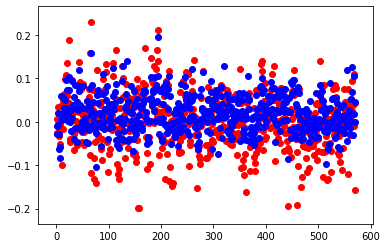

In [24]:
# graphing results
import seaborn as sns
import matplotlib.pyplot as plt

page_scores = all_sent.groupby('page').mean()[['sid_score', 'tb_score']].reset_index()
first10 = page_scores.iloc[0:100]
last10 = page_scores.iloc[-100:]

#sns.relplot(kind='scatter', data=page_scores, x='page', y='tb_score')

plt.scatter(x=page_scores['page'], y=page_scores['sid_score'], c='r')
plt.scatter(x=page_scores['page'], y=page_scores['tb_score'], c='b')

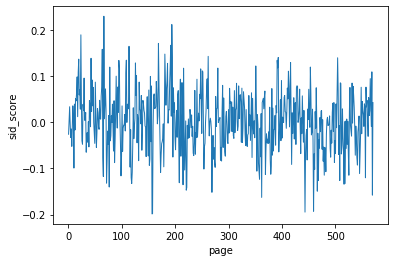

In [25]:


ax = sns.lineplot(x=page_scores['page'], y=page_scores['sid_score'], sort=False, lw=1)



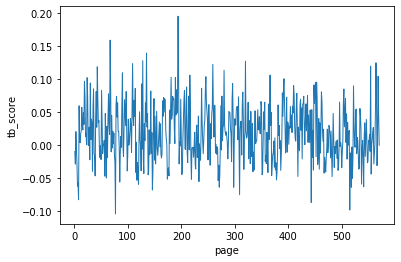

In [26]:


ax = sns.lineplot(x=page_scores['page'], y=page_scores['tb_score'], sort=False, lw=1)



Text(0.5, 1.0, 'Distibution of sentiment by Method (sentence)')

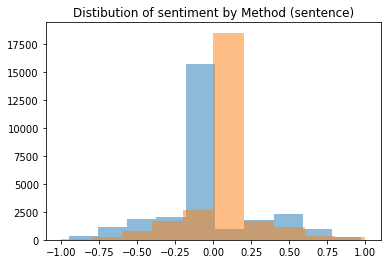

In [27]:


plt.hist(x=all_sent['sid_score'], alpha=0.5)
plt.hist(x=all_sent['tb_score'], alpha=0.5)
plt.title('Distibution of sentiment by Method (sentence)')



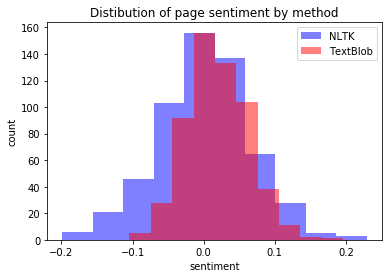

In [28]:
plt.hist(x=page_scores['sid_score'], alpha=0.5, color='b', label='NLTK')
plt.hist(x=page_scores['tb_score'], alpha=0.5, color='r', label='TextBlob')
plt.legend()
plt.title('Distibution of page sentiment by method')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.savefig('graph')